In [1]:
#! /usr/bin/env python

import random
import numpy as np
import matplotlib.pyplot as plt
import time

from PIL import Image
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interact
import ipywidgets as widgets

In [2]:
def phi(x, y, L):
    """Edge function."""
    assert x == 0 or x == L or y == 0 or y == L
    if x == 0 or x == L:
        return 1
    return 0

In [3]:
def value_on_point_reached(x, y, L, alpha):
    """Simulate the random walk until the cemetery or the edge is reached, starting from point (x, y).
    If the cemetery is reached, return 0.
    If the edge is reached, return the value of phi for this position.
    """
    while not (x == 0 or x == L or y == 0 or y == L) :
        rand = random.random()
        q = (1-alpha)/4
        if 0 <= rand < q:
            x -= 1  # go left
        elif q <= rand < 2*q:
            x += 1  # go right
        elif 2*q <= rand < 3*q:
            y -= 1  # go down
        elif 3*q <= rand < 4*q:
            y += 1  # go up
        else:
            # this iteration made us reach the cemetery (probability alpha)
            return 0
    # We have left the while loop for having reached an edge. Return the value of phi at this position.
    return phi(x, y, L)
    

In [4]:
def monte_carlo(x, y, L, alpha, K):
    """Simulate K times on point (x, y) and return the average result."""
    sum = 0
    for _ in range(K):
        sum += value_on_point_reached(x, y, L, alpha)
    return sum/K

In [5]:
def approximate_solution(L, alpha, K):
    start = time.time()
    averages = np.zeros((L, L))
    for x in range(L):
        for y in range(L):
            averages[x][y] = monte_carlo(x, y, L, alpha, K)
    print("time L = {} K = {} gamma = {}: {:.2f}s".format(L, K, alpha*L**2, time.time() - start))
    return averages

In [6]:
def plot_approximate_solution(L, alpha, K):
    plt.imshow(approximate_solution(L, alpha, K).T, origin="lower",
               extent=[0, 1, 0, 1], cmap="jet")
    plt.show()

time L = 50 K = 100 gamma = 100.0: 2.65s


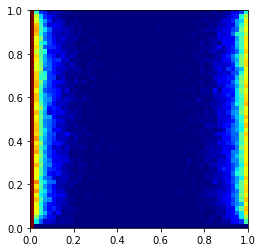

In [7]:
def test():
    """Main function."""
    L = 50  # discretize with squares of length 1/L
    K = 100  # number of simulations per point to compute the average result
    gamma = 100
    alpha = gamma/L**2
    plot_approximate_solution(L, alpha, K)
    
if __name__ == "__main__":
    test()